In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
import matplotlib.ticker as mtick


#### Leo los datos del archivo y selecciono columnas

In [73]:
datos_covid = pd.read_csv(r'C:\Users\usuario\Desktop\Gino\Covid-19\Covid19arData - historico.csv')
columnas_seleccionadas = ['fecha', 'nue_casosconf_diff', 'nue_fallecidos_diff', 'transmision_tipo' , 'covid19argentina_admin_level_4']
datos_covid = datos_covid[columnas_seleccionadas]
datos_covid.head()

,fecha,nue_casosconf_diff,nue_fallecidos_diff,transmision_tipo,covid19argentina_admin_level_4
0,2/03/2020,1,0,importado,capital-federal
1,3/03/2020,0,0,importado,no-data
2,4/03/2020,0,0,importado,no-data
3,5/03/2020,1,0,importado,buenos-aires
4,6/03/2020,0,0,importado,no-data


#### Renombro las columnas

In [74]:
datos_covid.rename(columns={'fecha': 'fecha_registro', 'nue_casosconf_diff':'nuevo_infectado','nue_fallecidos_diff':'nuevo_fallecido','covid19argentina_admin_level_4': 'provincia'}, inplace=True)
datos_covid.head()

,fecha_registro,nuevo_infectado,nuevo_fallecido,transmision_tipo,provincia
0,2/03/2020,1,0,importado,capital-federal
1,3/03/2020,0,0,importado,no-data
2,4/03/2020,0,0,importado,no-data
3,5/03/2020,1,0,importado,buenos-aires
4,6/03/2020,0,0,importado,no-data


#### Muestro grafico de barras por infectados por provincia

In [76]:
infectados_por_provincia = datos_covid.groupby('provincia').sum()
infectados_por_provincia.rename(columns={'nuevo_infectado': 'total_infectados', 'nuevo_fallecido': 'total_fallecidos'}, inplace=True)

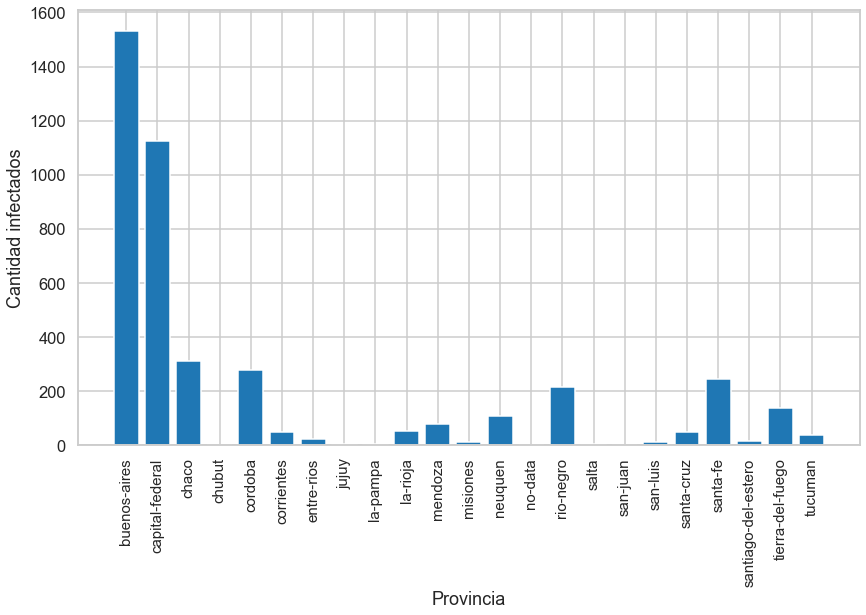

In [77]:
plt.figure(figsize=(14,8))
plt.bar(infectados_por_provincia.index,infectados_por_provincia['total_infectados'])
plt.xticks(infectados_por_provincia.index)
plt.ylabel('Cantidad infectados')
plt.xlabel('Provincia')
plt.xticks(infectados_por_provincia.index, rotation='vertical', size=15)
plt.show()

#### Cantidad de casos por tipo de transmision

In [78]:

datos_covid.groupby('transmision_tipo').sum()['nuevo_infectado']

transmision_tipo
importado                   159
transmision comunitaria    2012
transmision local           106
Name: nuevo_infectado, dtype: int64

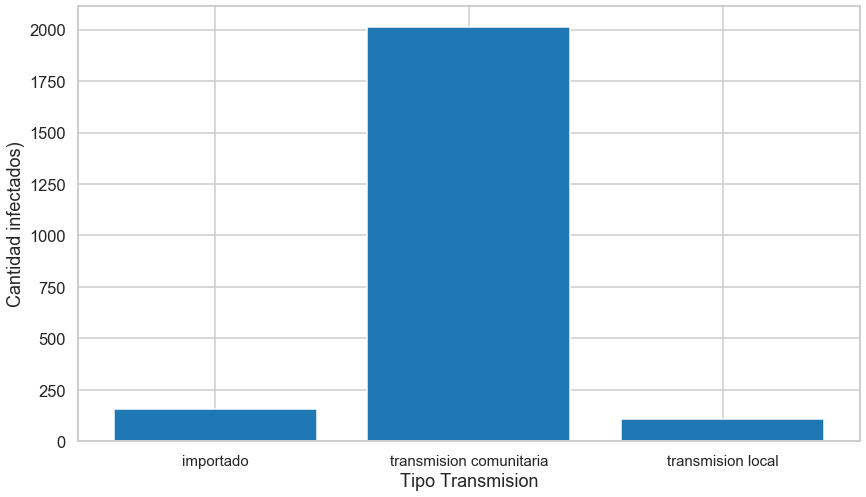

In [79]:
plt.figure(figsize=(14,8))
datos_covid_sin_nan = datos_covid.dropna(how='all')
keys = [trans for trans, df in datos_covid_sin_nan.groupby(['transmision_tipo'])]
plt.bar(keys, datos_covid_sin_nan.groupby('transmision_tipo').sum()['nuevo_infectado'])
plt.ylabel('Cantidad infectados)')
plt.xlabel('Tipo Transmision')
plt.xticks(keys, rotation='horizontal', size=15)
plt.show()

#### Curva de contagios

In [82]:
datos_covid['fecha_registro'] = pd.to_datetime(datos_covid['fecha_registro'],dayfirst=True) 
datos_covid['cantidad_hasta_fecha'] = datos_covid.groupby(datos_covid['fecha_registro'].datos_covid.to_period('fecha_registro')).sum()

AttributeError: 'Series' object has no attribute 'datos_covid'